# Supervised Learning
Given a set of data (demographics, vitals, measurements, etc) with a labelled output (pain level, mortality rate, readmission rate, etc) we try to fit a model that can predict outputs based on unseen inputs. The outputs can be categories (classification) or numeric values (regression) using methods like linear, logistic, polynomial regression, decision trees, SVM, neural networks

Examples of Supervised Learning Problems
* Image Classification
* Diagnosing
* Disease Prediction/Prognosis

# Regression

Linear Regression: $y = \beta_0+\beta_1x_1+\beta_2x_2+...+\beta_nx_n$

$x_i$ is a predictor variable

$y$ is the outcome you are predicting

Logistic Regression $P = \frac{e^{\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_nx_n}}{1+e^{\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_nx_n}}$

$P$ - this is the probability, takes a value between 0 and 1.

$x_i$ are again predictor variables

Regressions can be used for inference and prediction. It is used for inference because a t-test is performed on each variable's coefficient, comparing it to 0, to see if it significantly impacts our output. It's used for prediction because we can feed it data outside of our dataset and get an output.

## Logistic Regression Example: Heart Disease

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
We give an example of logistic regression here, the principles are the same as linear regression. We want to know if we can use the data to predict whether a patient will have some heart disease.

In [23]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

file_path = 'Data/heart.csv'
heart_data = pd.read_csv(file_path)

In [24]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploration

<Axes: xlabel='RestingBP', ylabel='Count'>

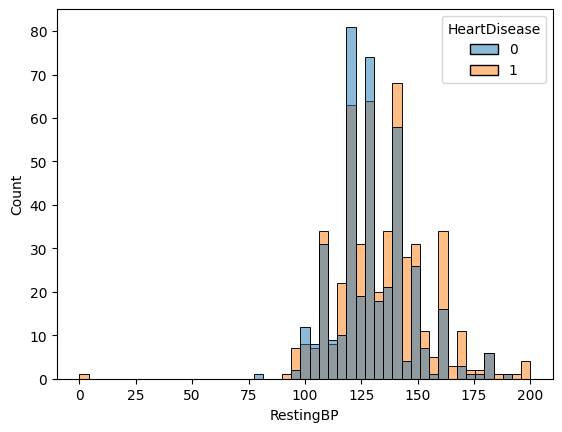

In [25]:
#heart_data.hist(column="RestingBP",by="HeartDisease")
sns.histplot(x="RestingBP",data=heart_data,hue="HeartDisease")

<Axes: xlabel='RestingECG', ylabel='count'>

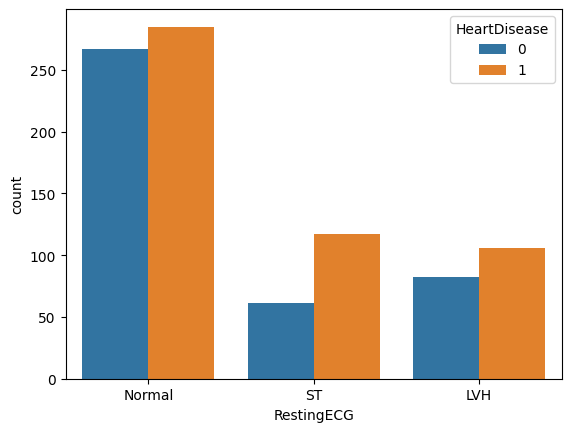

In [26]:
sns.countplot(x="RestingECG",data=heart_data,hue="HeartDisease")

In [27]:
X = heart_data.drop(columns=['HeartDisease'])  # All columns except the target
y = heart_data['HeartDisease']

In [28]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [29]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

<img src="Media/ohe.webp" alt="title" width="600">

In [30]:
X = pd.get_dummies(X, drop_first=True,dtype=int) 
# Must one hot encode 

In [31]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [32]:
#X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.323998
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      903
Method:                           MLE   Df Model:                           14
Date:                Sun, 14 Sep 2025   Pseudo R-squ.:                  0.5287
Time:                        20:54:00   Log-Likelihood:                -297.43
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                2.473e-133
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0102      0.011      0.954      0.340      -0.011       0.031
RestingB

AUC: 0.9327


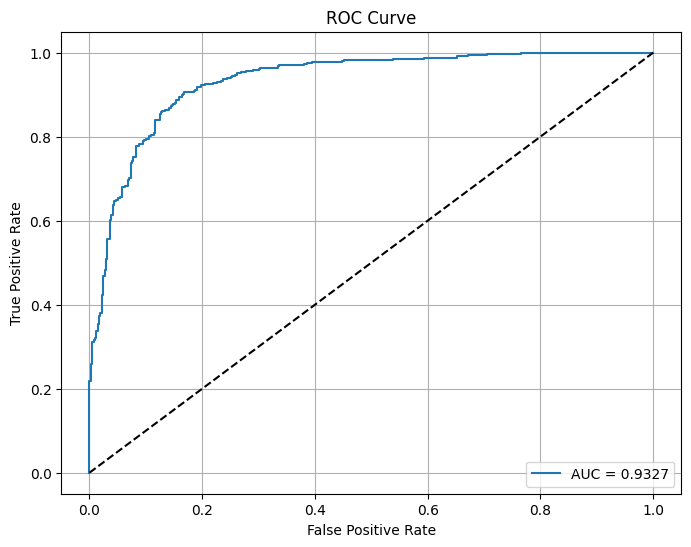

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_probs = result.predict(X)

# Compute AUC
auc = roc_auc_score(y, y_pred_probs)
print(f"AUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.646372
         Iterations 5


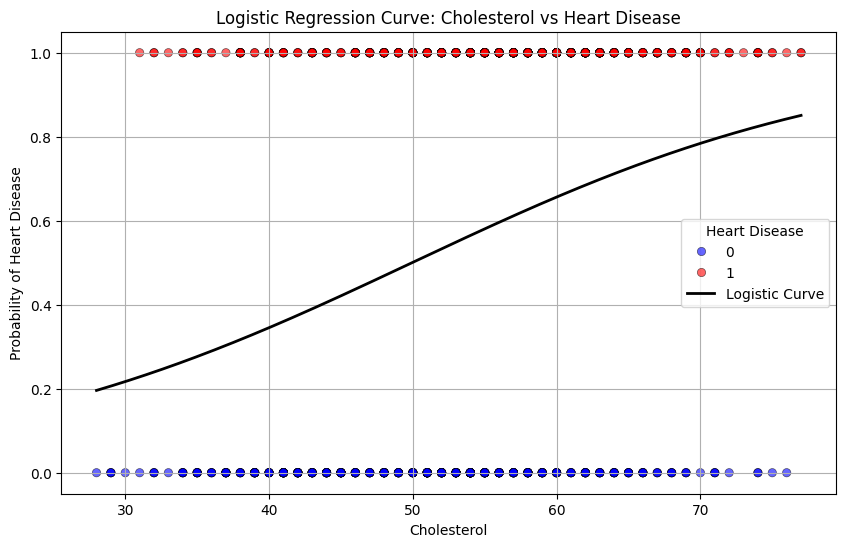

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

cholesterol = heart_data['Age']
y = heart_data['HeartDisease']

X_chol = sm.add_constant(cholesterol)
model_chol = sm.Logit(y, X_chol)
result_chol = model_chol.fit()

# Predict over a range of cholesterol values
chol_range = np.linspace(cholesterol.min(), cholesterol.max(), 300)
X_range = sm.add_constant(chol_range)
y_pred = result_chol.predict(X_range)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cholesterol, y=y, hue=y, palette={0: 'blue', 1: 'red'}, alpha=0.6, edgecolor='k')
plt.plot(chol_range, y_pred, color='black', linewidth=2, label='Logistic Curve')
plt.xlabel('Cholesterol')
plt.ylabel('Probability of Heart Disease')
plt.title('Logistic Regression Curve: Cholesterol vs Heart Disease')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()


If we choose different probability thresholds for determining whether our prediction is 0 or 1 we get different TPR and FPR statistics which the ROC demonstrates graphically. If the AUC was .5 the model would be no better than chance, the closer to 1 the AUC is the better our model is at distinguishing 0 from 1. AUC is a metric we can use when comparing classification models.

<div style="background-color:white; display:inline-block; padding:10px;">
    <img src="Media/sensitivity_and _specificity.svg" alt="title" width="600">
</div>

F1 looks at a single threshold and balances the precision (PPV) and the Recall (sensitivity)

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP+FN}$

F1 Score = $\frac{2*Precision*Recall}{Precision+Recall}$

 Resource for ROC/AUC: https://www.youtube.com/watch?v=4jRBRDbJemM

## Overfitting

The function may perform well on the data given, but this data may not be representative of future data leading to a phenomenon known as overfitting. One way to check for this is using cross validation, where we hold out some of the data to test on after training on everything else. This is usually repeated multiple times with different subsets of data with the accuracy averaged out across runs to get a reasonable metric

<img src="Media/cv.png" alt="title" width="600">

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

X = heart_data.drop(columns=['HeartDisease'])
y = heart_data['HeartDisease']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)  # 'liblinear' works well for small datasets

# Use Stratified K-Fold for preserving class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred = cross_val_predict(logreg, X, y, cv=cv, method='predict')
y_pred_probs = cross_val_predict(logreg, X, y, cv=cv, method='predict_proba')[:, 1]
accuracies = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

# Metrics
f1 = f1_score(y, y_pred)
auc = roc_auc_score(y, y_pred_probs)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Output
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracies per fold: {accuracies}")
print(f"Mean Accuracy: {accuracies.mean():.4f}")


C:\Users\camer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\camer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

F1 Score: 0.8794
AUC: 0.9240
Precision: 0.8692
Recall: 0.8898
Confusion Matrix:
[[342  68]
 [ 56 452]]
Accuracies per fold: [0.84782609 0.8423913  0.84782609 0.86885246 0.76502732]
Mean Accuracy: 0.8344


C:\Users\camer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For prediction, you can include a regularization term to prevent overfitting, e.g. ridge or lasso regression. In lasso regression, some of the coefficients may become zero so this technique can be used as feature selection
Resource: https://www.youtube.com/watch?v=Xm2C_gTAl8c

## Decision Trees

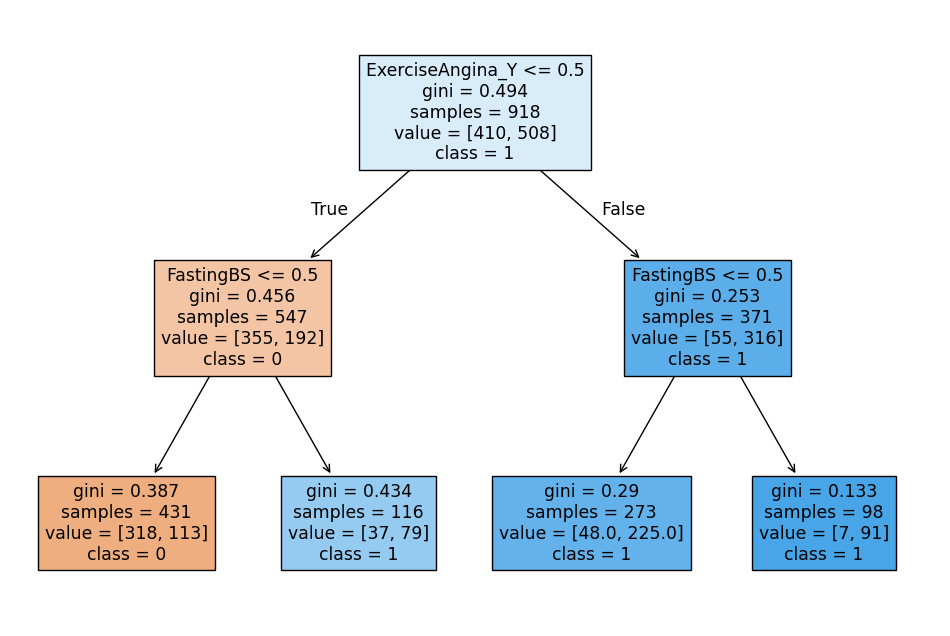

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = X[["FastingBS", "ExerciseAngina_Y"]]
clf = DecisionTreeClassifier(random_state=42)  # you can tweak hyperparameters like max_depth, criterion, etc.

# Fit the model
clf.fit(X, y)

# Predict on the training data (or new data)
y_pred = clf.predict(X)

#visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], filled=True)
plt.show()

Decision Trees Explained: https://www.youtube.com/watch?v=_L39rN6gz7Y

Random forests are quite popular in practice, a random subset of the data is taken and a decision tree is created, this is repeated many times. When an input is given, it is ran over all decision trees and the majority output will win

<img src="Media/randomforest.png" alt="title" width="600">

## Neural Networks

Neural networks have been used to work on supervised learning problems like regression and classification (though there are unsupervised method e.g. image generation to an extent).

<img src="Media/ann.webp" alt="title" width="600">

A feedforward neural network/multilayer perceptron is essentially multiple linear regression done repeatedly on the inputs (the weights are the $\beta$'s) with a non linear "activating function" applied to the outputs. Those outputs are used as the new inputs and the process is repeated. Other functions/training tricks are applied to outputs but this is the general idea

# Unsupervised Learning

Unsupervised learning looks to sort out data without an output marker. For example, given our heart data we can perform a clustering algorithm that identifies patterns without regard to the heart disease output. This can help with exploration of the data, potentially pointing out patterns or groups we may not have normally noticed

In [19]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
y = heart_data["HeartDisease"]

In [24]:
cluster_data = heart_data.drop(columns=["ChestPainType","Sex","FastingBS","RestingECG","ExerciseAngina","Oldpeak","ST_Slope","HeartDisease"])

In [25]:
cluster_data.head()

,Age,RestingBP,Cholesterol,MaxHR
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


One common clustering technique is k-means which creates k clusters based on closeness of points (which is why we mainly use numerical data). We should also scale our data as we don't want categories with larger absolute distances to overtake the clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

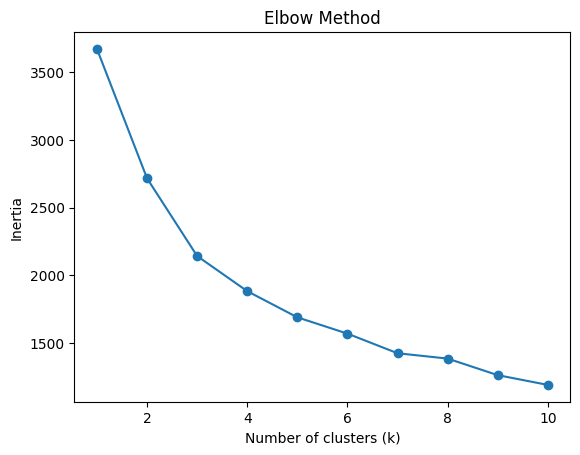

In [38]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

# Plot the elbow graph
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

<img src="Media/Elbow-Method.png" alt="title" width="600">

The elbow is unclear here so we can use another metric, silhouette score, to determine the optimal number of clusters. Silhouette scores range from -1 to 1, with closer to 1 being "better" (more differentiated) clusters

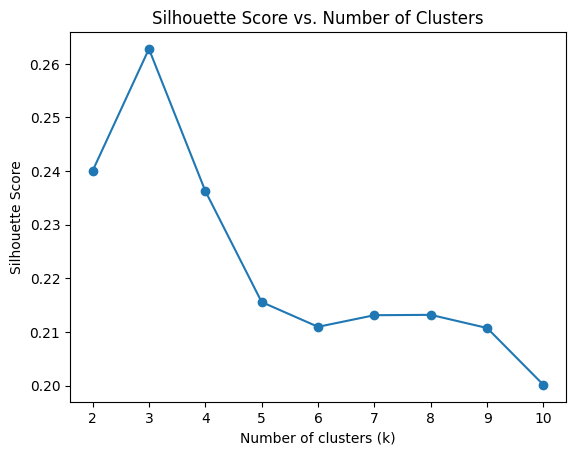

In [37]:
sil_scores = []
k_range = range(2, 11)  # silhouette score needs at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    sil_scores.append(score)

# Plot the silhouette scores
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [41]:
k = 3  # Example value
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled_data)

<Axes: xlabel='Age', ylabel='Cholesterol'>

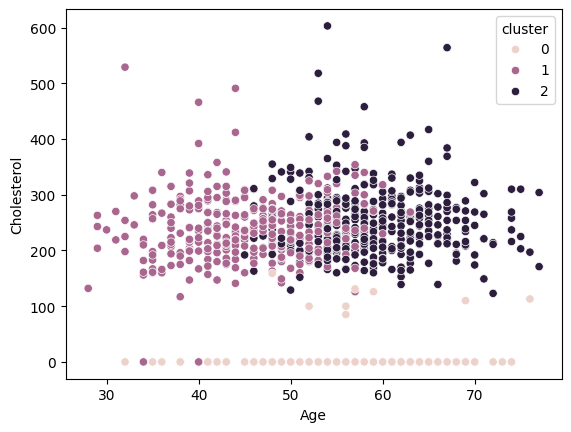

In [43]:
sns.scatterplot(x=cluster_data['Age'],y=cluster_data['Cholesterol'],hue=cluster_data['cluster'])

It's hard to visualize our data since we have 4 variables, we can use Principal Component Analysis (another form of unsupervised learning) to reduce the dimensions from 4 to 2

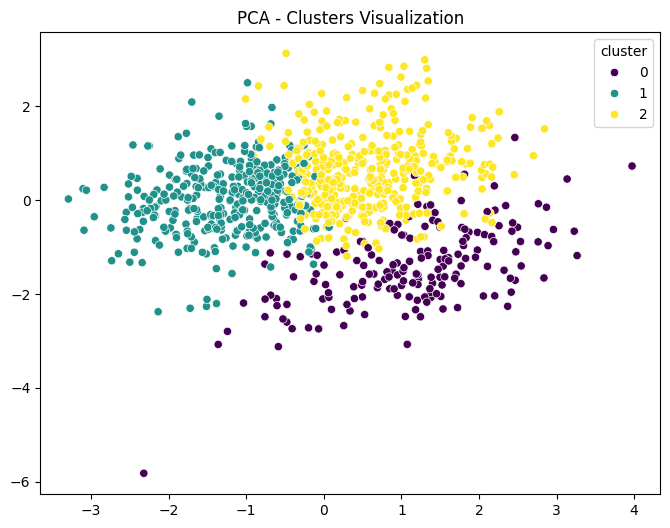

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_data['cluster'], palette='viridis')
plt.title('PCA - Clusters Visualization')
plt.show()

<img src="Media/PCA-viz.png" alt="title" width="600">

PCA Visualization Example: https://setosa.io/ev/principal-component-analysis/

Neural Network Primer: https://www.youtube.com/watch?v=aircAruvnKk